Linear Regression MSE: 4.155121037542665
SVM Regression MSE: 5.7262379062190405


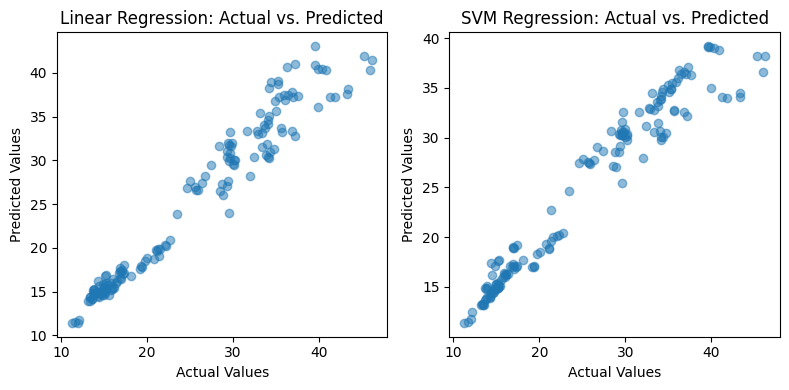

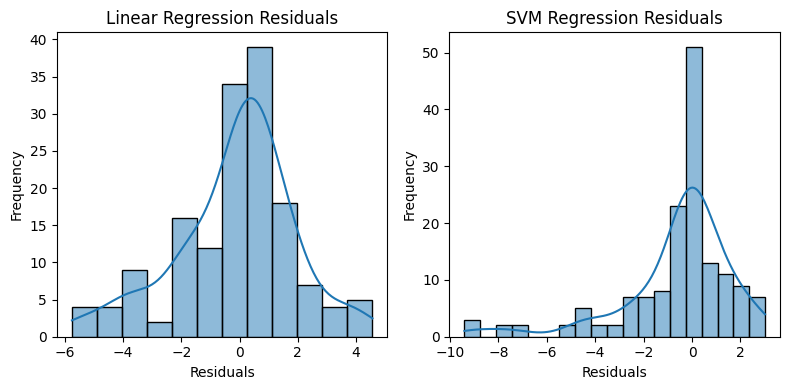

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("/content/archive.zip")

# Assuming you have combined your data into a DataFrame named 'df'
# Split the data into X (features) and y (target variable)
X = df.iloc[:, :-1]  # Assuming the last column is your target variable
y = df.iloc[:, -1]

# Perform Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)

# SVM Regression
svm_reg_model = SVR(kernel='linear')  # You can choose different kernels
svm_reg_model.fit(X_train, y_train)
svm_reg_predictions = svm_reg_model.predict(X_test)
svm_reg_mse = mean_squared_error(y_test, svm_reg_predictions)

print("Linear Regression MSE:", linear_reg_mse)
print("SVM Regression MSE:", svm_reg_mse)

# Plot actual vs. predicted values for Linear Regression
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_test, linear_reg_predictions, alpha=0.5)
plt.title("Linear Regression: Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Plot actual vs. predicted values for SVM Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, svm_reg_predictions, alpha=0.5)
plt.title("SVM Regression: Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()

# Plot residuals (predicted - actual) for Linear Regression
residuals_linear = linear_reg_predictions - y_test
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(residuals_linear, kde=True)
plt.title("Linear Regression Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Plot residuals (predicted - actual) for SVM Regression
residuals_svm = svm_reg_predictions - y_test
plt.subplot(1, 2, 2)
sns.histplot(residuals_svm, kde=True)
plt.title("SVM Regression Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()